<a href="https://colab.research.google.com/github/dhruvpratapsingh/Deep-Learning/blob/master/Predict_Stock_Price_LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

### Predict Stock Market Trend

In [0]:
# Prepare evironment

## 1. Get Data

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.52-py2.py3-none-any.whl size=21997 sha256=1859ac90c9b092229e06cb4a7fc128818d2d117b6583d6d1354a8a6699f03581
  Stored in directory: /root/.cache/pip/wheels/1b/9d/ce/929e851fc7d649cd962c177220ad985675785aa97c54df5714
Successfully built yfinance


In [0]:
import yfinance as yf

ticker = yf.Ticker("SPY")

# get stock info
#ticker.info

#ticker.get_info()["longBusinessSummary"]

# get historical market data, here max is 5 years.
df = ticker.history(period='5y', interval='1d')

In [3]:
ticker.get_info()["longBusinessSummary"]

'The investment seeks to provide investment results that, before expenses, correspond generally to the price and yield performance of the S&P 500Â® Index.\n The Trust seeks to achieve its investment objective by holding a portfolio of the common stocks that are included in the index (the â\x80\x9cPortfolioâ\x80\x9d), with the weight of each stock in the Portfolio substantially corresponding to the weight of such stock in the index.'

In [5]:
print(df)

              Open    High     Low   Close     Volume  Dividends  Stock Splits
Date                                                                          
2014-12-23  188.64  188.70  187.94  188.26  122167900       0.00             0
2014-12-24  188.51  188.80  188.23  188.28   42963400       0.00             0
2014-12-26  188.77  189.26  188.71  188.89   57326700       0.00             0
2014-12-29  188.69  189.37  188.62  189.14   79643900       0.00             0
2014-12-30  188.68  188.82  188.04  188.13   73540800       0.00             0
...            ...     ...     ...     ...        ...        ...           ...
2019-12-16  317.66  318.58  315.70  317.94   82749700       0.00             0
2019-12-17  318.35  318.68  317.92  318.01   61097700       0.00             0
2019-12-18  318.43  318.68  317.97  318.03   48133000       0.00             0
2019-12-19  318.24  319.41  317.96  319.33   85310500       0.00             0
2019-12-20  320.46  321.97  319.39  320.73  14714210

In [0]:
# df to csv converter
df.to_csv('SPY.csv', encoding='utf-8')

In [7]:
# See the extended API Doc
print(ticker.history(period='1y', interval='1d').__doc__)


    Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects

        .. versionchanged :: 0.23.0
           If data is a dict, column order follows insertion-order for
           Python 3.6 and later.

        .. versionchanged :: 0.25.0
           If data is a list of dicts, column order follows insertion-order
           for Python 3.6 and later.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to 

In [0]:
dfTrain = ticker.history(period='5y', interval='1d', start=None, end='2019-11-20')

In [0]:
# Save Training set
dfTrain.to_csv('spy_stock_price_train.csv', encoding='utf-8')

In [0]:
dfTest = ticker.history(period='5y', interval='1d', start='2019-11-21', end='2019-12-20')

In [0]:
# Save Test set
dfTest.to_csv('spy_stock_price_test.csv', encoding='utf-8')

## 2. Data Preprocessing

In [0]:
# import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# iLoc relevant colums from the training set
# Adding .values makes it a numpy array which we need to feed it to Keras
training_set = dfTrain.iloc[:,1:2].values

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 time steps and 1 output
# This is an important dp step in RNN
X_train = []
y_train = []

for i in range(60, training_set_scaled.size):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the data to input to keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### Miscelleneous

In [35]:
print(type(dfTrain))

<class 'pandas.core.frame.DataFrame'>


In [33]:
print(training_set[:][:5])

[[188.01]
 [188.7 ]
 [188.8 ]
 [189.26]
 [189.37]]


In [39]:
print(training_set_scaled)

[[0.11694133]
 [0.12148978]
 [0.12214898]
 ...
 [0.97831246]
 [0.98312459]
 [1.        ]]


In [42]:
training_set_scaled.shape

(1259, 1)

## 3. Building the RNN

In [11]:
# Import keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [12]:
# Initialize RNN
regressor = Sequential()

In [13]:
# Adding the first LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding the second LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding the fourth LSTM layer and some Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [0]:
# Output layer of RNN
regressor.add(Dense(units=1))

In [0]:
# Compiling RNN
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [19]:
#Fitting the RNN to Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 23s 20ms/step - loss: 0.0365
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0038
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0038
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0035
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0036
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0032
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0029
Epoch 11/100
1198/1198 [=============

## 4. Making the predictions and visualizing the results

In [0]:
# Getting the real stock price of Dec 2019
real_stock_price = dfTest.iloc[:,1:2].values

In [0]:
# Getting the predicted stock price of Dec 2019
dataset_total = pd.concat((dfTrain['Open'], dfTest['Open']), axis=0)

In [0]:
# Visulazing the results
inputs = dataset_total[len(dataset_total) - len(dfTest) - 60 : ].values 

In [0]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []

for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

# Reshaping the data to input to keras
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

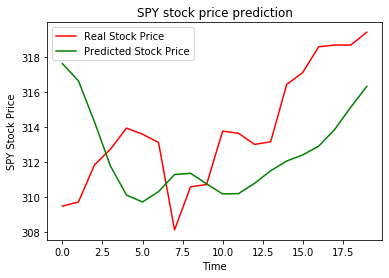

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')

plt.title('SPY stock price prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()